# Sentiment Analysis with Python

## Import and read data

In [54]:
import numpy as np
import pandas as pd
import nltk
import random
import string

from nltk.corpus import movie_reviews


#nltk.download('punkt')
#nltk.download('movie_reviews')
#nltk.download('all')

In [18]:
movie_reviews.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [27]:
#we can have lists of positive and negative reviews separately.
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [3]:
len(movie_reviews.fileids())

2000

In [28]:
len(negative_fileids)

1000

In [29]:
len(positive_fileids)

1000

In [26]:
#it finds all the words in fileids()[0]
movie_reviews.words(movie_reviews.fileids()[0])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [23]:
movie_reviews.raw(movie_reviews.fileids()[0])

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [30]:
#another pos review
print(movie_reviews.raw(fileids=positive_fileids[0]))

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

In [5]:
nltk.FreqDist(movie_reviews.words())

FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [6]:
nltk.FreqDist(movie_reviews.words()).most_common(10)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822)]

In [31]:
#nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)


all_words = (w.lower() for w in movie_reviews.words())
all_words_clean = [word for word in all_words if word not in stopwords]



all_words_freq = nltk.FreqDist(all_words_clean)

word_features = [item[0] for item in all_words_freq.most_common(2000)]


In [8]:
word_features

['film',
 'one',
 'movie',
 'like',
 'even',
 'good',
 'time',
 'story',
 'would',
 'much',
 'character',
 'also',
 'get',
 'two',
 'well',
 'characters',
 'first',
 '--',
 'see',
 'way',
 'make',
 'life',
 'really',
 'films',
 'plot',
 'little',
 'people',
 'could',
 'scene',
 'man',
 'bad',
 'never',
 'best',
 'new',
 'scenes',
 'many',
 'director',
 'know',
 'movies',
 'action',
 'great',
 'another',
 'love',
 'go',
 'made',
 'us',
 'big',
 'end',
 'something',
 'back',
 'still',
 'world',
 'seems',
 'work',
 'makes',
 'however',
 'every',
 'though',
 'better',
 'real',
 'audience',
 'enough',
 'seen',
 'take',
 'around',
 'going',
 'year',
 'performance',
 'role',
 'old',
 'gets',
 'may',
 'things',
 'think',
 'years',
 'last',
 'comedy',
 'funny',
 'actually',
 'long',
 'look',
 'almost',
 'thing',
 'fact',
 'nothing',
 'say',
 'right',
 'john',
 'although',
 'played',
 'find',
 'script',
 'come',
 'ever',
 'cast',
 'since',
 'star',
 'plays',
 'young',
 'show',
 'comes',
 'part',

In [32]:
movie_reviews.categories()

['neg', 'pos']

In [9]:
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)


In [39]:
documents[0][0]

['sometimes',
 'a',
 'movie',
 'comes',
 'along',
 'that',
 'falls',
 'somewhat',
 'askew',
 'of',
 'the',
 'rest',
 '.',
 'some',
 'people',
 'call',
 'it',
 '"',
 'original',
 '"',
 'or',
 '"',
 'artsy',
 '"',
 'or',
 '"',
 'abstract',
 '"',
 '.',
 'some',
 'people',
 'simply',
 'call',
 'it',
 '"',
 'trash',
 '"',
 '.',
 'a',
 'life',
 'less',
 'ordinary',
 'is',
 'sure',
 'to',
 'bring',
 'about',
 'mixed',
 'feelings',
 '.',
 'definitely',
 'a',
 'generation',
 '-',
 'x',
 'aimed',
 'movie',
 ',',
 'a',
 'life',
 'less',
 'ordinary',
 'has',
 'everything',
 'from',
 'claymation',
 'to',
 'profane',
 'angels',
 'to',
 'a',
 'karaoke',
 '-',
 'based',
 'musical',
 'dream',
 'sequence',
 '.',
 'whew',
 '!',
 'anyone',
 'in',
 'their',
 '30',
 "'",
 's',
 'or',
 'above',
 'is',
 'probably',
 'not',
 'going',
 'to',
 'grasp',
 'what',
 'can',
 'be',
 'enjoyed',
 'about',
 'this',
 'film',
 '.',
 'it',
 "'",
 's',
 'somewhat',
 'silly',
 ',',
 'it',
 "'",
 's',
 'somewhat',
 'outrageous

In [11]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features


In [12]:
# Train Naive Bayes classifier
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [13]:
print(nltk.classify.accuracy(classifier, test_set))

0.81


In [14]:
classifier.show_most_informative_features(10)

Most Informative Features
   contains(outstanding) = True              pos : neg    =     11.0 : 1.0
         contains(mulan) = True              pos : neg    =      9.0 : 1.0
        contains(seagal) = True              neg : pos    =      7.8 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.7 : 1.0
         contains(damon) = True              pos : neg    =      6.1 : 1.0
          contains(lame) = True              neg : pos    =      5.6 : 1.0
        contains(wasted) = True              neg : pos    =      5.6 : 1.0
         contains(awful) = True              neg : pos    =      5.2 : 1.0
           contains(era) = True              pos : neg    =      5.0 : 1.0
         contains(flynt) = True              pos : neg    =      5.0 : 1.0


## Train a Classifier for Sentiment Analysis

In [42]:
#The collection package of the standard library contains a Counter class that is handy for counting frequencies of words in our list
from collections import Counter

word_counter = Counter(all_words_clean)
word_counter

Counter({'plot': 1513,
         'two': 1911,
         'teen': 151,
         'couples': 27,
         'go': 1113,
         'church': 69,
         'party': 183,
         'drink': 32,
         'drive': 105,
         'get': 1949,
         'accident': 104,
         'one': 5852,
         'guys': 268,
         'dies': 104,
         'girlfriend': 218,
         'continues': 88,
         'see': 1749,
         'life': 1586,
         'nightmares': 26,
         'deal': 219,
         'watch': 603,
         'movie': 5771,
         'sorta': 10,
         'find': 782,
         'critique': 61,
         'mind': 451,
         'fuck': 17,
         'generation': 96,
         'touches': 55,
         'cool': 208,
         'idea': 386,
         'presents': 78,
         'bad': 1395,
         'package': 30,
         'makes': 992,
         'review': 295,
         'even': 2565,
         'harder': 33,
         'write': 119,
         'since': 768,
         'generally': 103,
         'applaud': 10,
         'films': 15

In [43]:
#Then we would like to have a visualization of this using matplotlib.
%matplotlib inline
import matplotlib.pyplot as plt

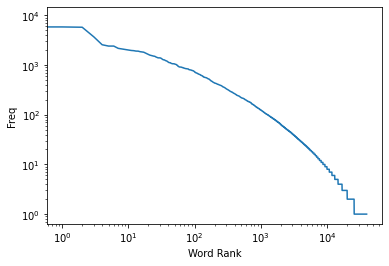

In [44]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

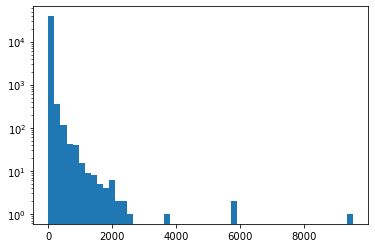

In [45]:
plt.hist(sorted_word_counts, bins=50, log=True);

In [50]:
def build_bag_of_words_features_filtered(words):
    return {
        word:1 for word in words \
        if not word in stopwords}

In [51]:
negative_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'neg') \
    for f in negative_fileids]